In [7]:
import pandas as pd
df_etab = pd.read_csv('data_les_institutions_fr5.csv')

In [8]:
dic_id_paysage_RGP = {'PpsCQ':'Université Paris sciences et lettres',
                      'RS4WF':'CY Cergy Paris Université',
                      'kYR50':'Institut polytechnique de Paris',
                      'qUCQp':'Nantes Université',
                      'bxPQe':'Sorbonne Université',
                      'LorStr':'Strasbourg/Lorraine et associés',
                      'K4lR3':'Université Clermont Auvergne',
                      's3t8T':"Université Côte d'Azur",
                      'U8a0v':'Université de Lille',
                      'evv7S':'Université de Montpellier',
                      '91D9w':'Université de Rennes',
                      '4a8B2':'Université de Toulouse',
                      'Y7ch7':'Université Grenoble Alpes',
                      '3Z5e6':'Université Gustave Eiffel',
                      '5cZyU':'Université Paris Cité',
                      'TWBzp':'Université Paris-Panthéon-Assas',
                      'G2qA7':'Université Paris-Saclay',
                      'EW53M':'Université Polytechnique Hauts-de-France',
                      'ClZg2':'COMUE Angers-Le Mans',
                      '8A0mg':'Université Bourgogne - Franche-Comté',
                      'iq0rG':'ComUE Lyon Saint-Étienne',
                      'G1r6y':'Normandie Université',
                      'M2Z5a':'Alliance Languedoc-Roussillon Universités',
                      'A89E8':'AUB - Alliance universitaire de Bretagne',
                      'r1bRZ':'Alliance universitaire Aliénor d’Aquitaine',
                      'XeJDw':'Convention de coordination en Nouvelle-Aquitaine',
                      '6g0Mb':'Paris-Est Sup',
                      'TW2ed':'Site Aix-Marseille-Provence-Méditerranée',
                      'dkZ2k':'Alliance Sorbonne Université',
                      'qIw2S':'Site champenois',
                      'G63n4':'CY Alliance'
}

df_etab = pd.read_csv('data_les_institutions_fr5.csv')

etab_dict={}
for row in df_etab.itertuples():
    key = f'{row.year}##{row.institution_id}'
    rgp = row.uo_lib
    is_tracked = False
    if isinstance(row.id_paysage_RGP, str) and row.id_paysage_RGP in dic_id_paysage_RGP:
        rgp = dic_id_paysage_RGP[row.id_paysage_RGP]
        is_tracked = True
    if rgp in list(dic_id_paysage_RGP.values()):
        is_tracked = True
    #if isinstance(row.id_paysage_RGP, str) and row.id_paysage_RGP not in dic_id_paysage_RGP:
    #    print(row.id_paysage_RGP)
    etab_dict[key] = {'year': row.year, 'intsitution_id':row.institution_id, 'uo_lib': row.uo_lib, 'id_paysage_RGP': rgp, 'is_tracked': is_tracked}

In [9]:
pd.DataFrame(list(etab_dict.values()))

,year,intsitution_id,uo_lib,id_paysage_RGP,is_tracked
0,2022,https://openalex.org/I1294671590,Centre national de la recherche scientifique,Centre national de la recherche scientifique,False
1,2021,https://openalex.org/I1294671590,Centre national de la recherche scientifique,Centre national de la recherche scientifique,False
2,2023,https://openalex.org/I1294671590,Centre national de la recherche scientifique,Centre national de la recherche scientifique,False
3,2020,https://openalex.org/I1294671590,Centre national de la recherche scientifique,Centre national de la recherche scientifique,False
4,2019,https://openalex.org/I1294671590,Centre national de la recherche scientifique,Centre national de la recherche scientifique,False
...,...,...,...,...,...
11242,2021,https://openalex.org/I4210128968,Hôpital Corentin-Celton,Hôpital Corentin-Celton,False
11243,2021,https://openalex.org/I4210129108,Groupement de Recherche en Économie Quantitati...,Groupement de Recherche en Économie Quantitati...,False
11244,2021,https://openalex.org/I4210129617,"Handicap neuromusculaire : Physiopathologie, B...","Handicap neuromusculaire : Physiopathologie, B...",False
11245,2021,https://openalex.org/I4210129878,"Sorbonne - Identités, Relations Internationale...","Sorbonne - Identités, Relations Internationale...",False


In [10]:
agg_data_raw = {}
agg_data_etab = {}
agg_total = {}
for year in range(2018, 2024):
    print(f'reading {year}')
    df = pd.read_json(f'publications_ai_fr_{year}.jsonl', lines=True, orient='records')
    
    for row in df.itertuples():
        current_id = row.id.split('/')[-1]
        for a in row.authorships:
            for inst in a.get('institutions'):
                key = f"{year}##{inst['id']}"
                if key not in etab_dict:
                    continue
                current_info = etab_dict[key]
                uo_lib = current_info['uo_lib']
                id_paysage_RGP = current_info['id_paysage_RGP']
                is_tracked = current_info['is_tracked']
                
                if f'{year}##total' not in agg_total:
                    agg_total[f'{year}##total'] = {'year':year, 'publications': set([]), 'is_tracked':False}
                agg_total[f'{year}##total']['publications'].add(current_id)
                
                ####

                if f'{year}##{uo_lib}' not in agg_data_raw:
                    agg_data_raw[f'{year}##{uo_lib}'] = {'year':year, 'uo_lib':uo_lib, 'publications': set([]), 'is_tracked':is_tracked}
                agg_data_raw[f'{year}##{uo_lib}']['publications'].add(current_id)
                
                #######
            
                
                if f'{year}##{id_paysage_RGP}' not in agg_data_etab:
                    agg_data_etab[f'{year}##{id_paysage_RGP}'] = {'year':year, 'id_paysage_RGP':id_paysage_RGP, 'publications': set([]), 'is_tracked':is_tracked}
                agg_data_etab[f'{year}##{id_paysage_RGP}']['publications'].add(current_id)
                

            
                
                

reading 2018
reading 2019
reading 2020
reading 2021
reading 2022
reading 2023


In [11]:
for e in agg_total:
    agg_total[e]['nb_publications'] = len(agg_total[e]['publications'])
for e in agg_data_raw:
    agg_data_raw[e]['nb_publications'] = len(agg_data_raw[e]['publications'])
for e in agg_data_etab:
    agg_data_etab[e]['nb_publications'] = len(agg_data_etab[e]['publications'])

In [12]:
df_raw = pd.DataFrame(list(agg_data_raw.values())).sort_values(by=['year', 'nb_publications'], ascending=False)
df_rgp = pd.DataFrame(list(agg_data_etab.values())).sort_values(by=['year', 'nb_publications'], ascending=False)

In [13]:
df_raw['fr_share'] = None
for ix, row in df_raw.iterrows():
    df_raw.at[ix, 'fr_share'] = int(10000*row.nb_publications / (agg_total[f'{row.year}##total']['nb_publications']))/100

df_rgp['fr_share'] = None
for ix, row in df_rgp.iterrows():
    df_rgp.at[ix, 'fr_share'] = int(10000*row.nb_publications / (agg_total[f'{row.year}##total']['nb_publications']))/100


In [14]:
df_rgp

,year,id_paysage_RGP,publications,is_tracked,nb_publications,fr_share
8800,2023,Centre national de la recherche scientifique,"{W4387242313, W4383557718, W4387012790, W43874...",False,6263,35.08
8843,2023,Institut polytechnique de Paris,"{W4387242313, W4386350571, W4309773410, W43275...",True,1785,9.99
8851,2023,Université Paris-Saclay,"{W4387242313, W4309773410, W4388621484, W43114...",True,1385,7.75
8791,2023,Alliance Sorbonne Université,"{W4387103196, W4225743392, W4308766780, W43683...",True,1155,6.46
8820,2023,Institut national de la santé et de la recherc...,"{W4317832372, W4387563977, W4390401726, W43827...",False,1111,6.22
...,...,...,...,...,...,...
1701,2018,Laboratoire de Physique des Gaz et des Plasmas,{W4377219814},False,1,0.0
1702,2018,Théorie et Histoire des Arts et des Littératur...,{W4387838968},False,1,0.0
1703,2018,Laboratoire Architecture Ville Urbanisme Envir...,{W4388641432},False,1,0.0
1704,2018,Agence Locale de l'Energie et du Climat de la ...,{W4390851856},False,1,0.0


# Top établissement 2022

In [15]:
def format_label(x):
    current_str=''
    res=[]
    for c in x.split(' '):
        if len(current_str)<15:
            current_str+=c+' '
        else:
            res.append(current_str)
            current_str=c+' '
    res.append(current_str)
    return '\n'.join(res).strip()
            
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
SIZE = 22
SMALL_SIZE=18
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title       

In [19]:
organismes=['Centre national de la recherche scientifique', 
            'Institut national de la santé et de la recherche médicale', 
           'Institut national de recherche en sciences et technologies du numérique',
           'Commissariat à l’énergie atomique et aux énergies alternatives',
           "Institut national de recherche pour l'agriculture, l'alimentation et l'environnement",
           "Institut de recherche pour le développement"]
color_dict = {}
color_dict['Université Paris-Saclay'] = '#63003C'
color_dict['Alliance Sorbonne Université'] = '#042f66'
color_dict['Université Grenoble Alpes'] = '#FF4E01'
color_dict['Institut polytechnique de Paris'] = 'black'
color_dict['Université Paris sciences et lettres']='#2F3B89'
color_dict['Université de Lorraine'] ='#FFF044'
color_dict['Université de Toulouse'] = '#BE2125'
color_dict['Université de Rennes'] = 'black'
color_dict["Université Côte d'Azur"] = "#007FA5"
color_dict['University of Strasbourg'] = '#303030'


In [20]:
year = 2023
#df_2022 = df_rgp[(df_rgp.year==year) & (df_rgp.is_tracked == True)]
df_2022 = df_rgp[(df_rgp.year==year)]
TOP = 20
top_etab = [{'etab': x, 'label': format_label(x)} for x in df_2022.head(100).id_paysage_RGP.to_list()]
top_shares = df_2022.head(100).fr_share.to_list()
top_count = df_2022.head(100)['nb_publications'].to_list()

top_etab_filtered, top_shares_filtered, top_count_filtered = [], [], []
for ix, t in enumerate(top_etab):
    if len(top_etab_filtered) == TOP:
        break
    if t['label'] not in [format_label(o) for o in organismes]:
        top_etab_filtered.append(t)
        top_shares_filtered.append(top_shares[ix])
        top_count_filtered.append(top_count[ix])
    else:
        pass
    
colors = ['grey']*TOP
for ix, etab in enumerate(top_etab_filtered):
    if etab['etab'] in color_dict:
        colors[ix] = color_dict[etab['etab']]
#colors

<ipython-input-21-036b7a57e00b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)


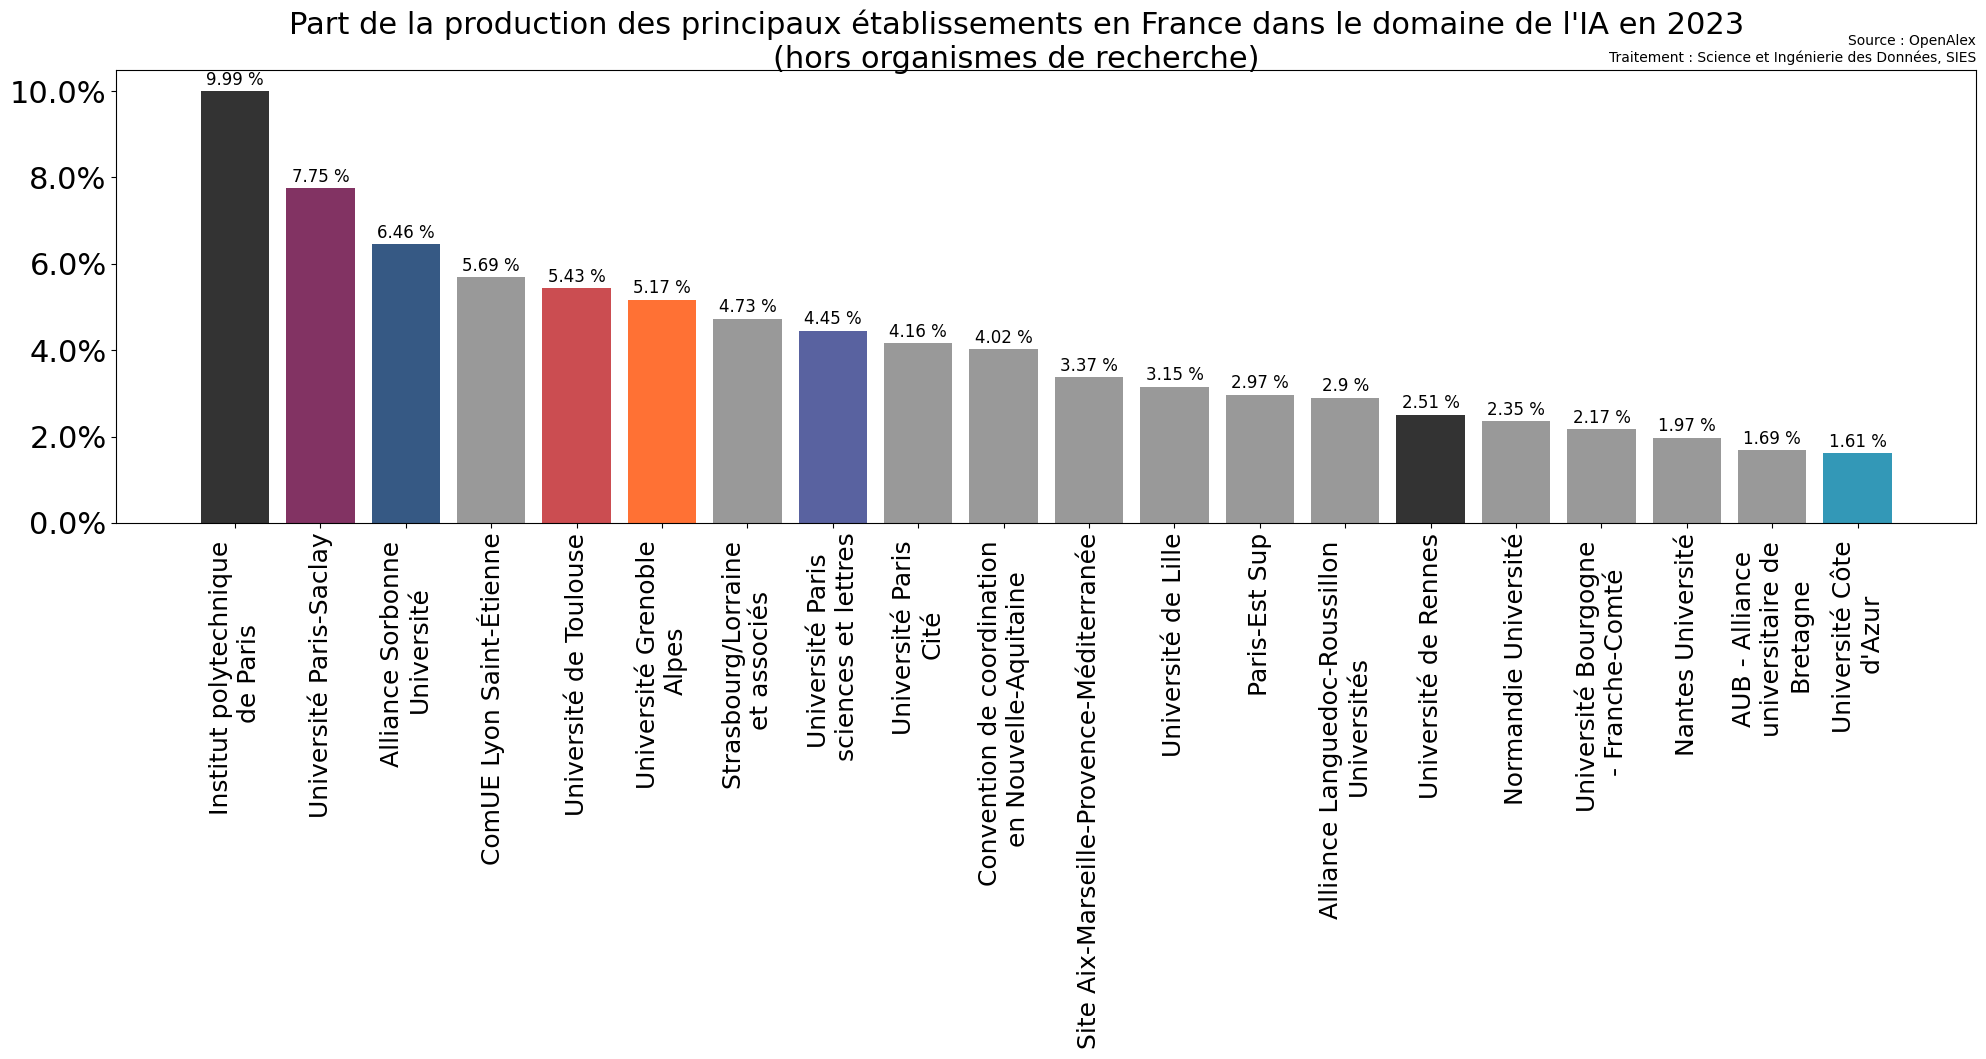

In [21]:
fig, ax = plt.subplots(figsize=(24,6), dpi=100)

ax.bar([e['label'] for e in top_etab_filtered], top_shares_filtered, 
       alpha=0.8, color=colors
      )
plt.suptitle(f"Part de la production des principaux établissements en France dans le domaine de l'IA en {year}\n(hors organismes de recherche)")
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)
for i in range(len(top_etab_filtered)):
    plt.text(i, top_shares_filtered[i]+0.15, str(top_shares_filtered[i])+' %', ha = 'center', fontsize=12)

In [22]:
df_etablissement_2023 = pd.DataFrame({'Etablissement': [e['etab'] for e in top_etab_filtered], 
              'Contribution 2023 (%)': top_shares_filtered,
             'Nombre de publications 2023 en IA': top_count_filtered})
df_etablissement_2023.to_csv('publications_2023_ia_etablissement.csv', index=False)

In [23]:
df_etablissement_2023

,Etablissement,Contribution 2023 (%),Nombre de publications 2023 en IA
0,Institut polytechnique de Paris,9.99,1785
1,Université Paris-Saclay,7.75,1385
2,Alliance Sorbonne Université,6.46,1155
3,ComUE Lyon Saint-Étienne,5.69,1016
4,Université de Toulouse,5.43,971
5,Université Grenoble Alpes,5.17,924
6,Strasbourg/Lorraine et associés,4.73,845
7,Université Paris sciences et lettres,4.45,795
8,Université Paris Cité,4.16,744
9,Convention de coordination en Nouvelle-Aquitaine,4.02,718


# Par etab

In [24]:
df_raw

,year,uo_lib,publications,is_tracked,nb_publications,fr_share
9314,2023,Centre national de la recherche scientifique,"{W4387242313, W4383557718, W4387012790, W43874...",False,6263,35.08
9381,2023,Institut polytechnique de Paris,"{W4387242313, W4309773410, W4327571560, W43875...",True,1454,8.14
9380,2023,Université Paris-Saclay,"{W4386272484, W4225743392, W4319001072, W43854...",True,1190,6.66
9335,2023,Institut national de la santé et de la recherc...,"{W4317832372, W4387563977, W4390401726, W43827...",False,1111,6.22
9305,2023,Sorbonne Université,"{W4387103196, W4225743392, W4386066075, W43683...",True,1040,5.82
...,...,...,...,...,...,...
1802,2018,Laboratoire de Physique des Gaz et des Plasmas,{W4377219814},False,1,0.0
1803,2018,Théorie et Histoire des Arts et des Littératur...,{W4387838968},False,1,0.0
1804,2018,Laboratoire Architecture Ville Urbanisme Envir...,{W4388641432},False,1,0.0
1805,2018,Agence Locale de l'Energie et du Climat de la ...,{W4390851856},False,1,0.0


In [25]:
def make_graph_share_year(current_etab, agg = True):
    if current_etab in color_dict:
        color = color_dict[current_etab]
    else:
        color='grey'
    current_df = df_rgp[df_rgp.id_paysage_RGP == current_etab ]
    if agg == False:
        current_df = df_raw[df_raw.uo_lib == current_etab ]
    current_df = current_df[2015<=current_df.year]
    #return current_df
    years = current_df.year.to_list()
    shares = current_df.fr_share.to_list()
    #shares_complement = [1-k for k in shares]

    fig, ax = plt.subplots(figsize=(24,6), dpi=100)

    ax.stackplot(years, [shares], 
                 labels=[current_etab], alpha=0.8, color=[color])
    ax.legend(loc='upper left')

    plt.suptitle(f"Part de la production de {current_etab} en France dans le domaine de l'IA")
    plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')
    ax.set_subplotspec
    ax.set_xlabel('Année')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(f"Contribution de {current_etab}")
    ax.set_ylim(0, 12)

    plt.show()

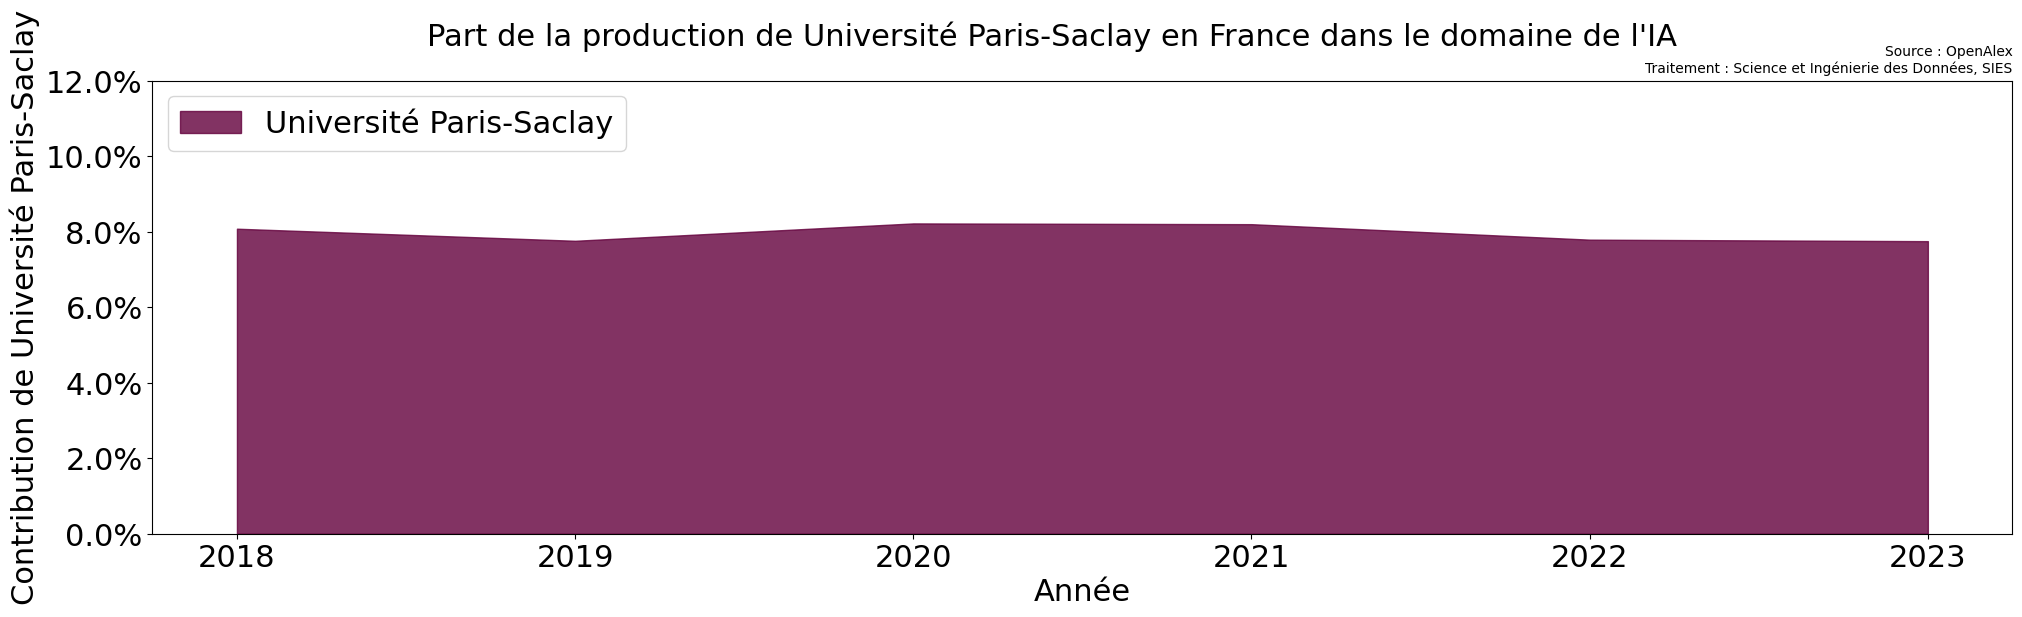

In [26]:
make_graph_share_year('Université Paris-Saclay')

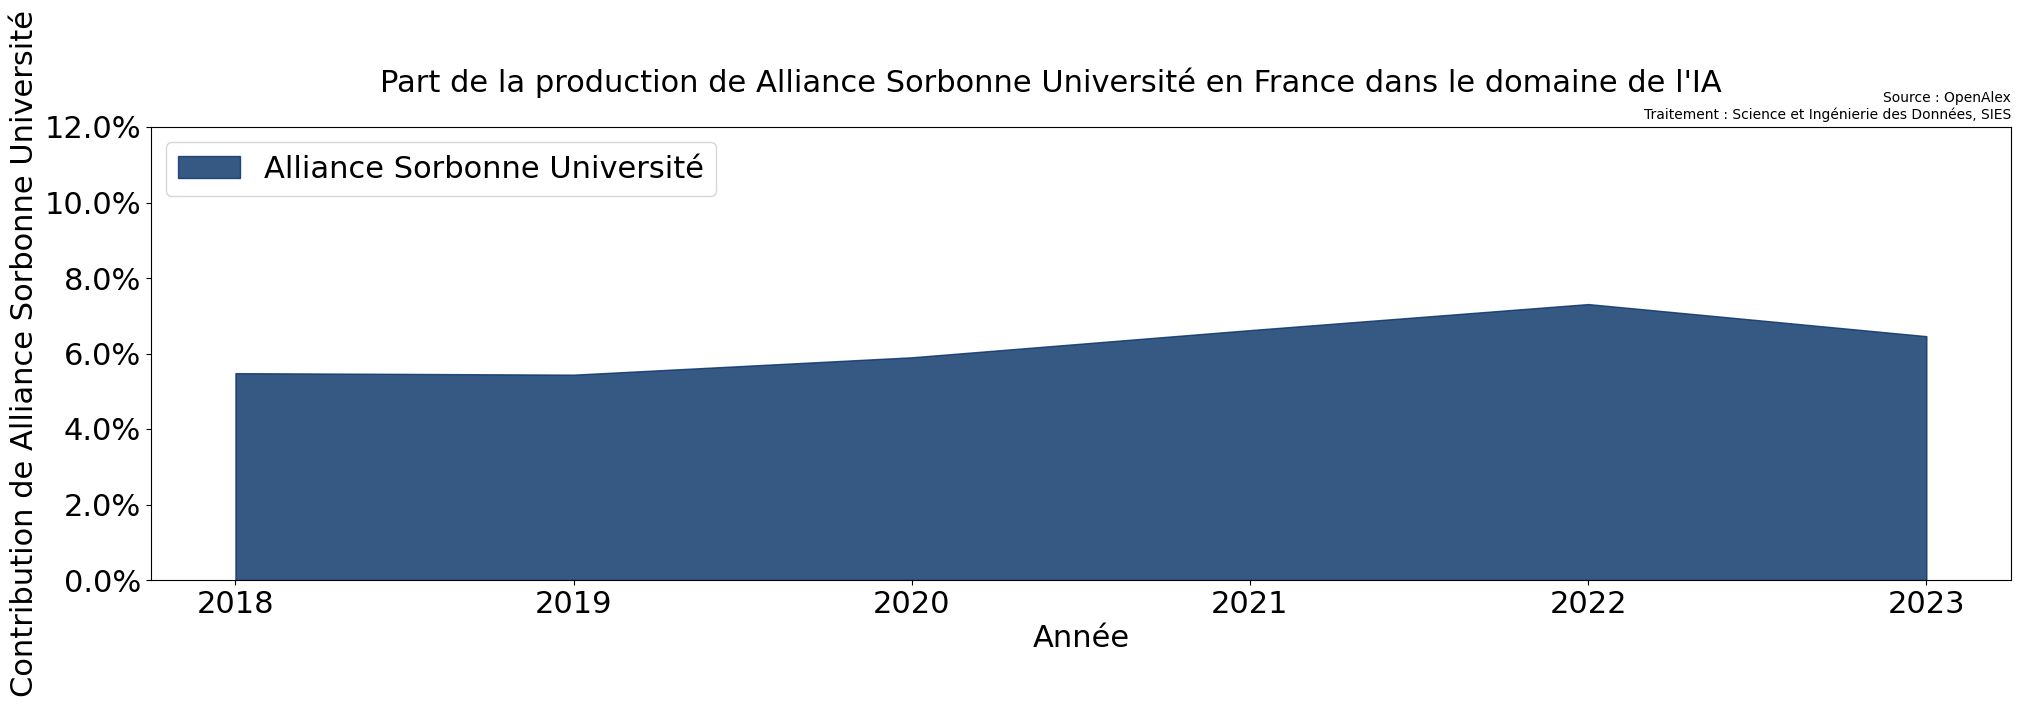

In [27]:
make_graph_share_year('Alliance Sorbonne Université')

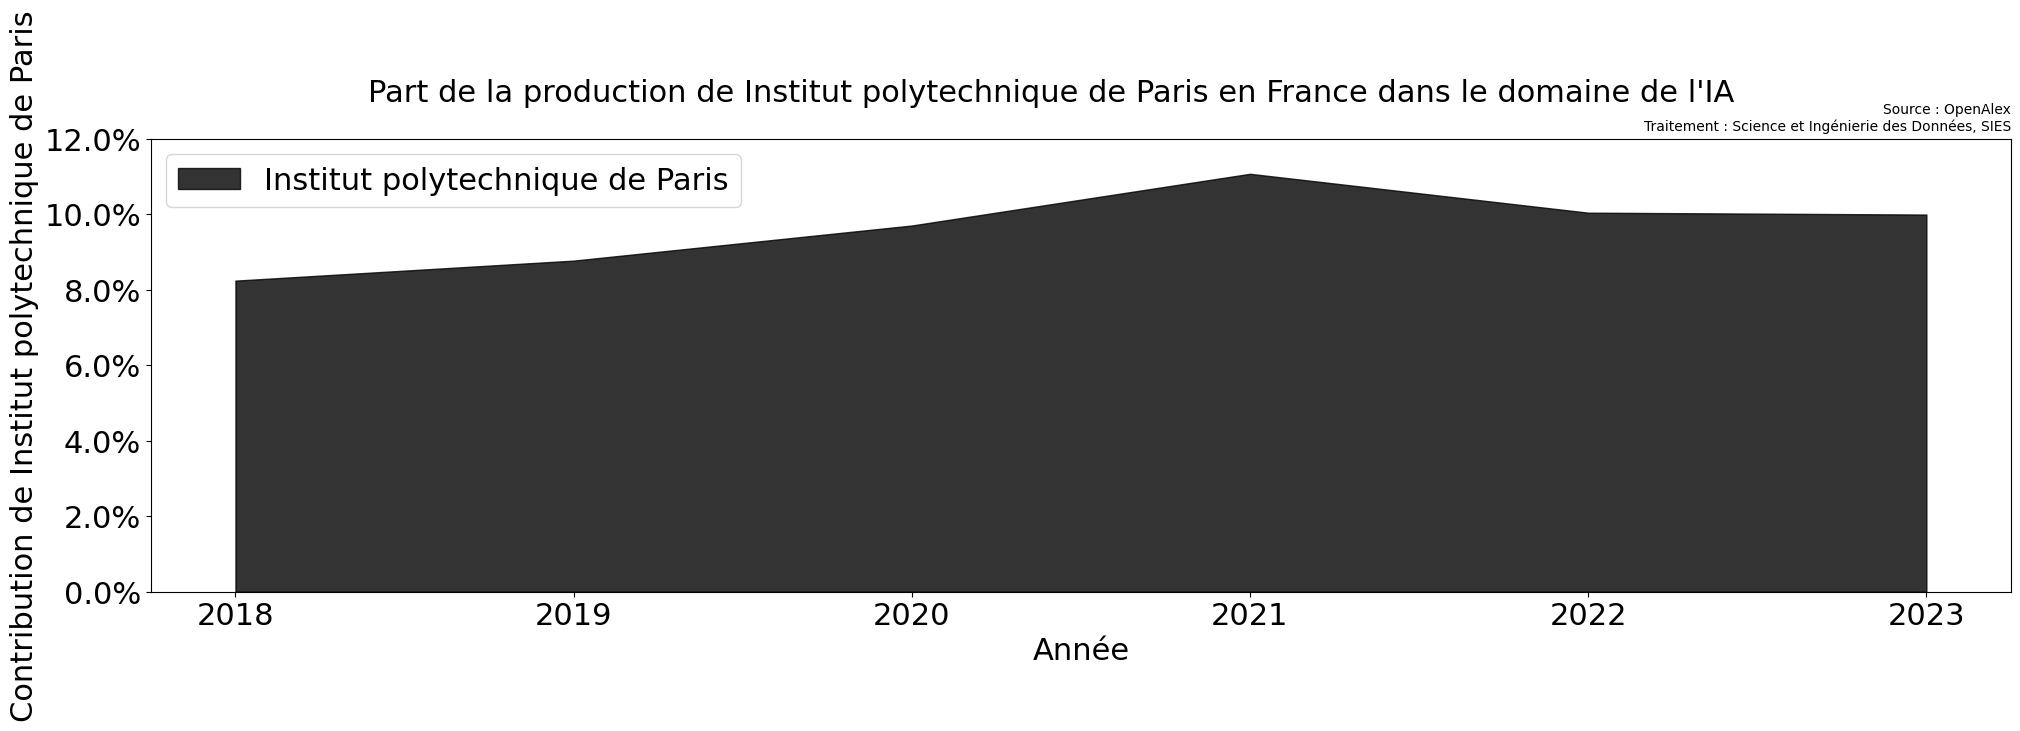

In [28]:
make_graph_share_year('Institut polytechnique de Paris')

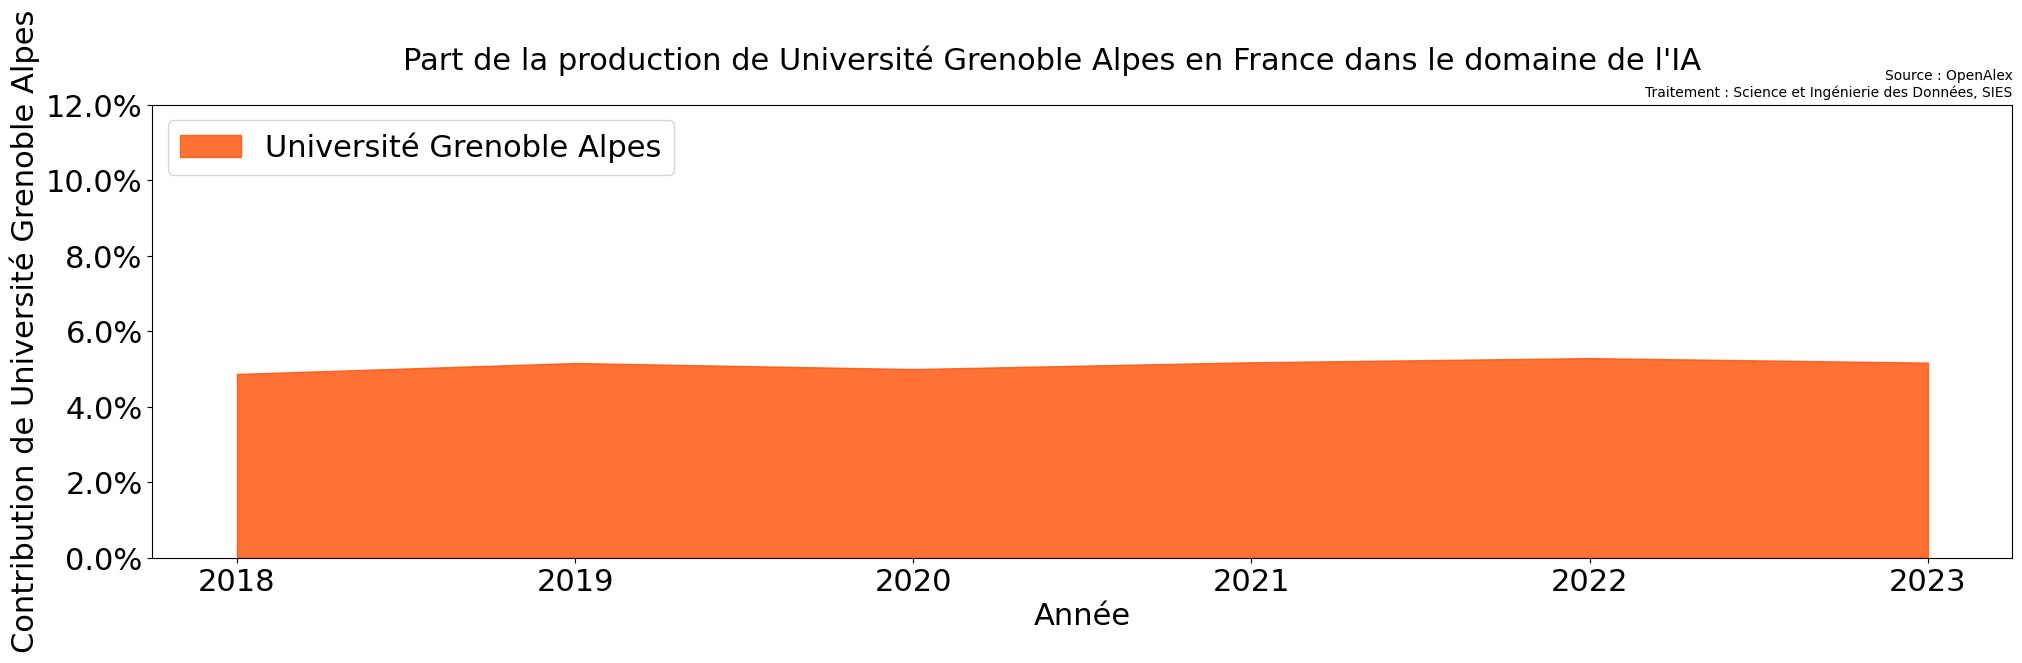

In [29]:
make_graph_share_year('Université Grenoble Alpes')

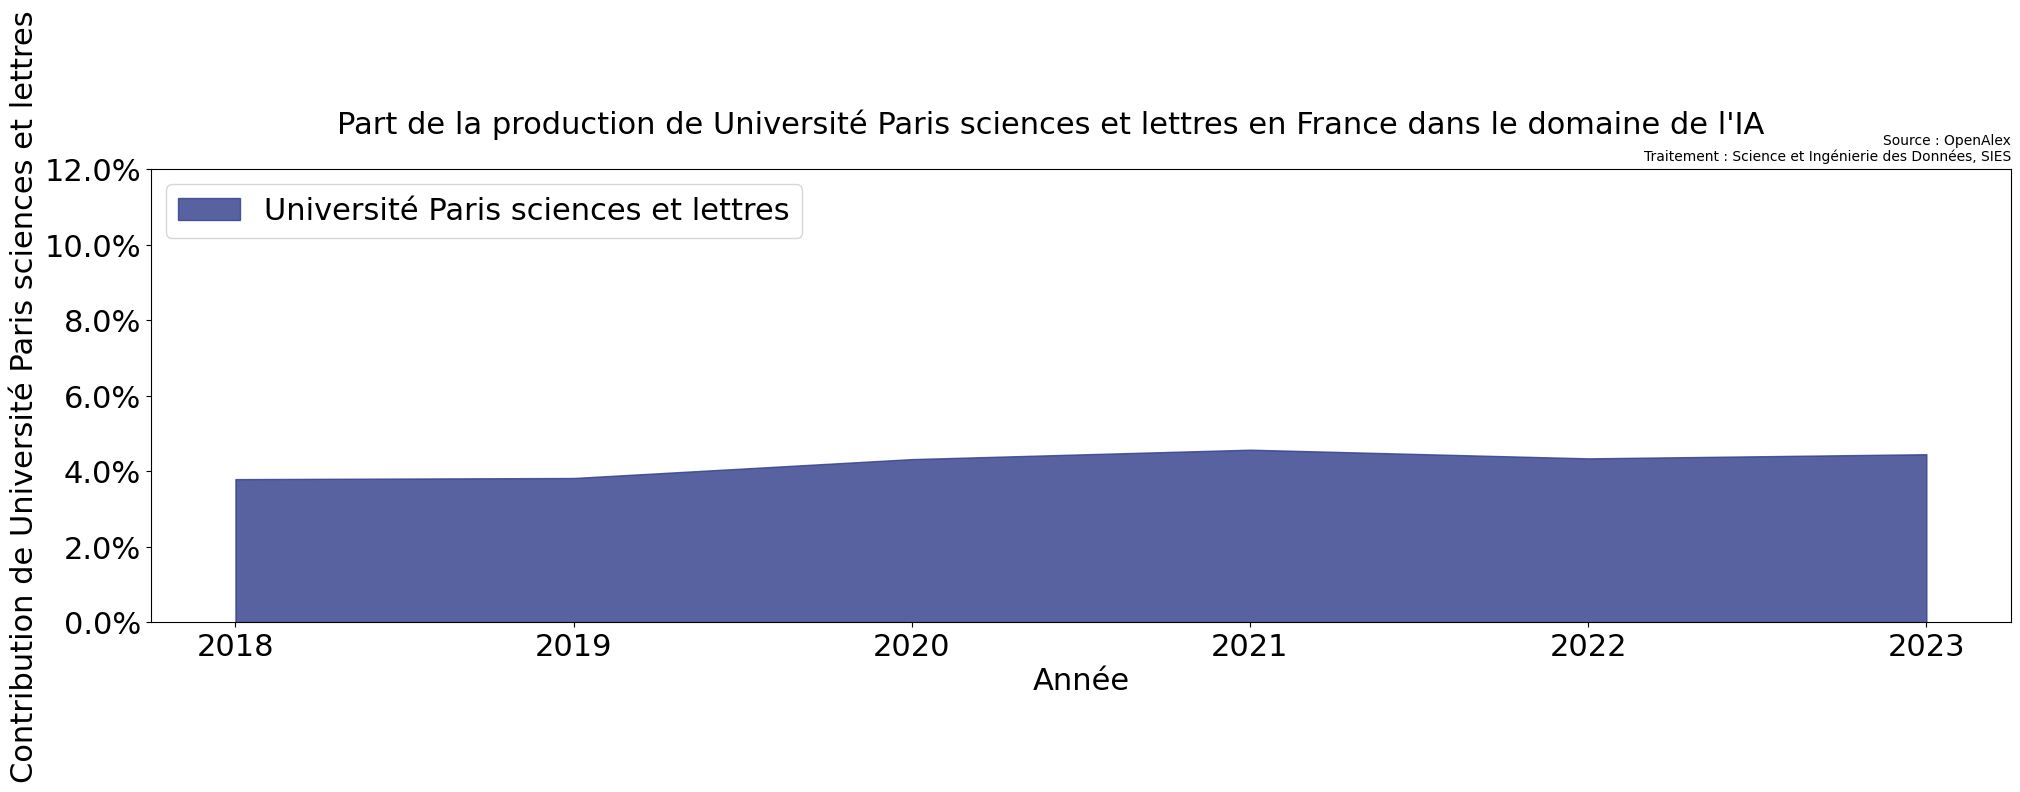

In [30]:
make_graph_share_year('Université Paris sciences et lettres')

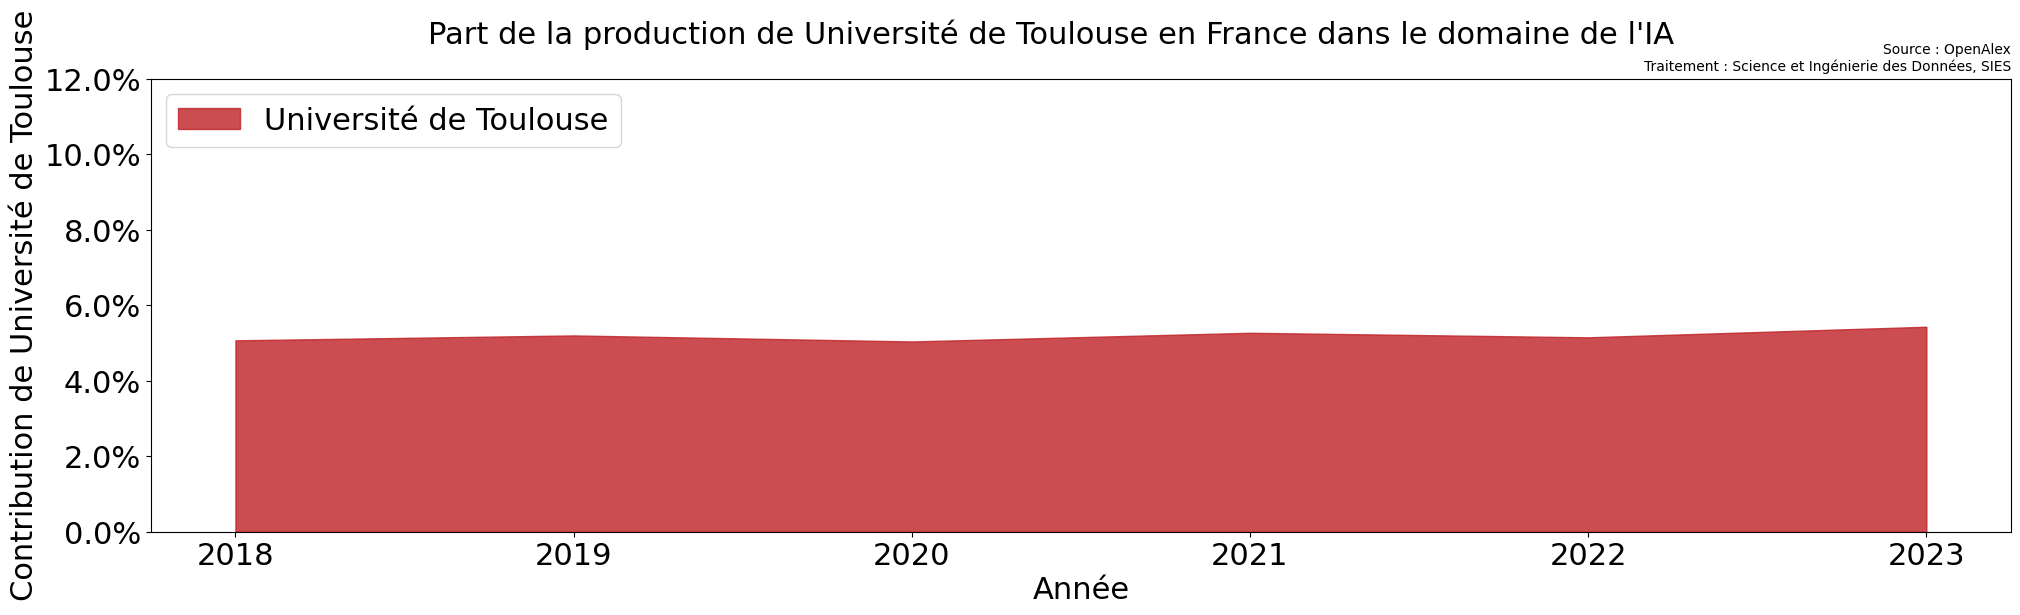

In [31]:
make_graph_share_year('Université de Toulouse')

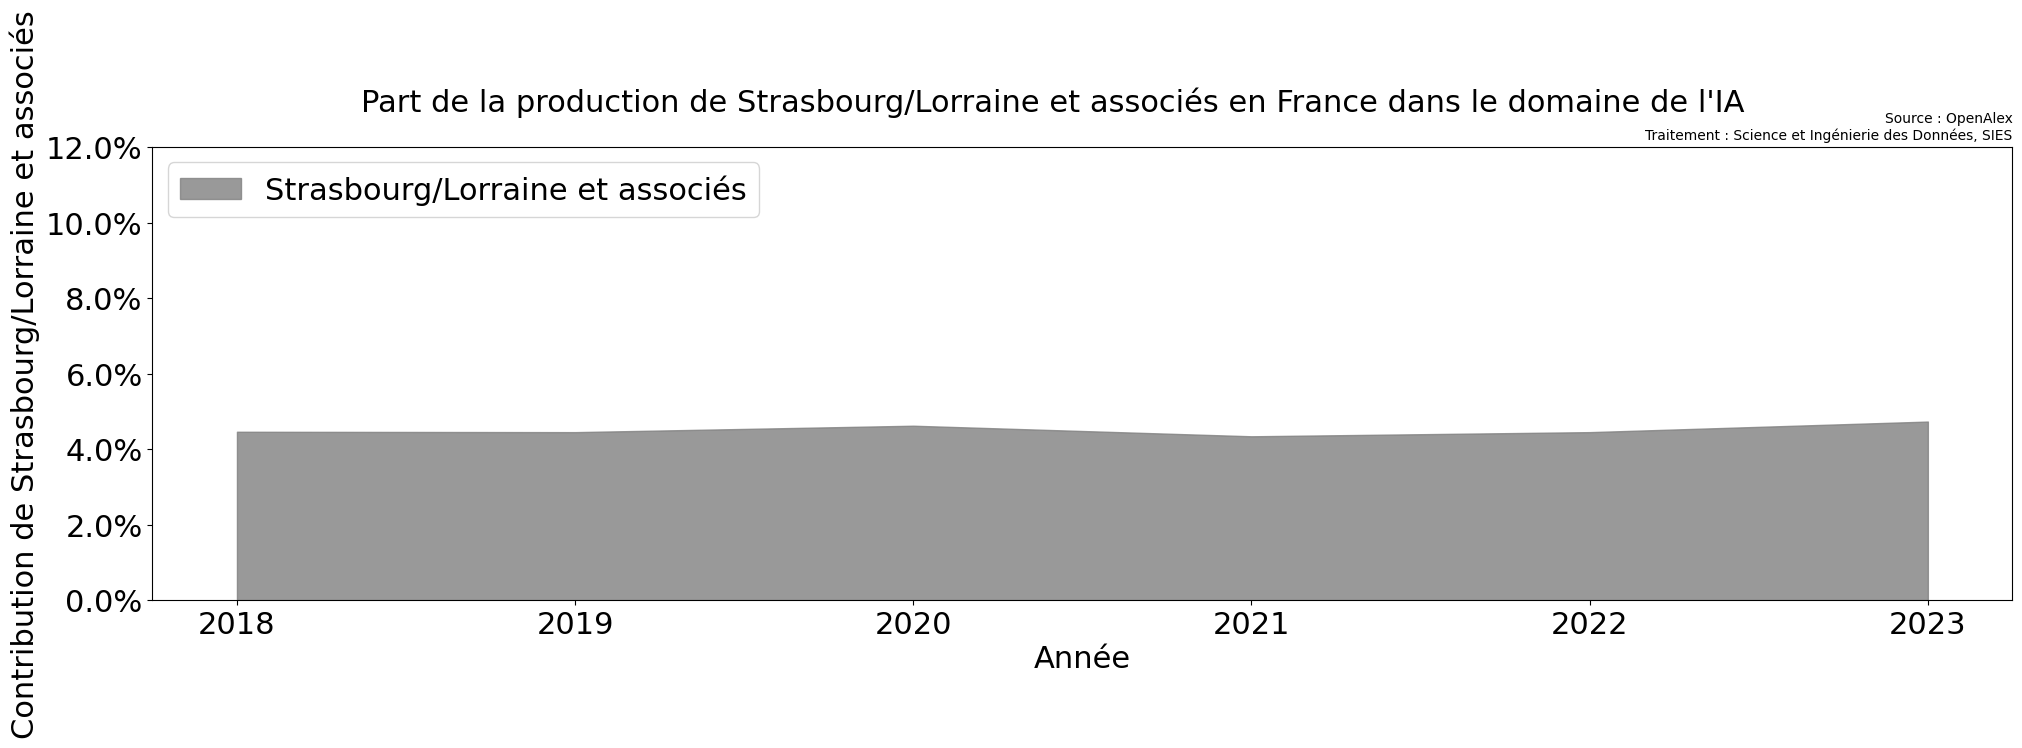

In [34]:
make_graph_share_year('Strasbourg/Lorraine et associés')

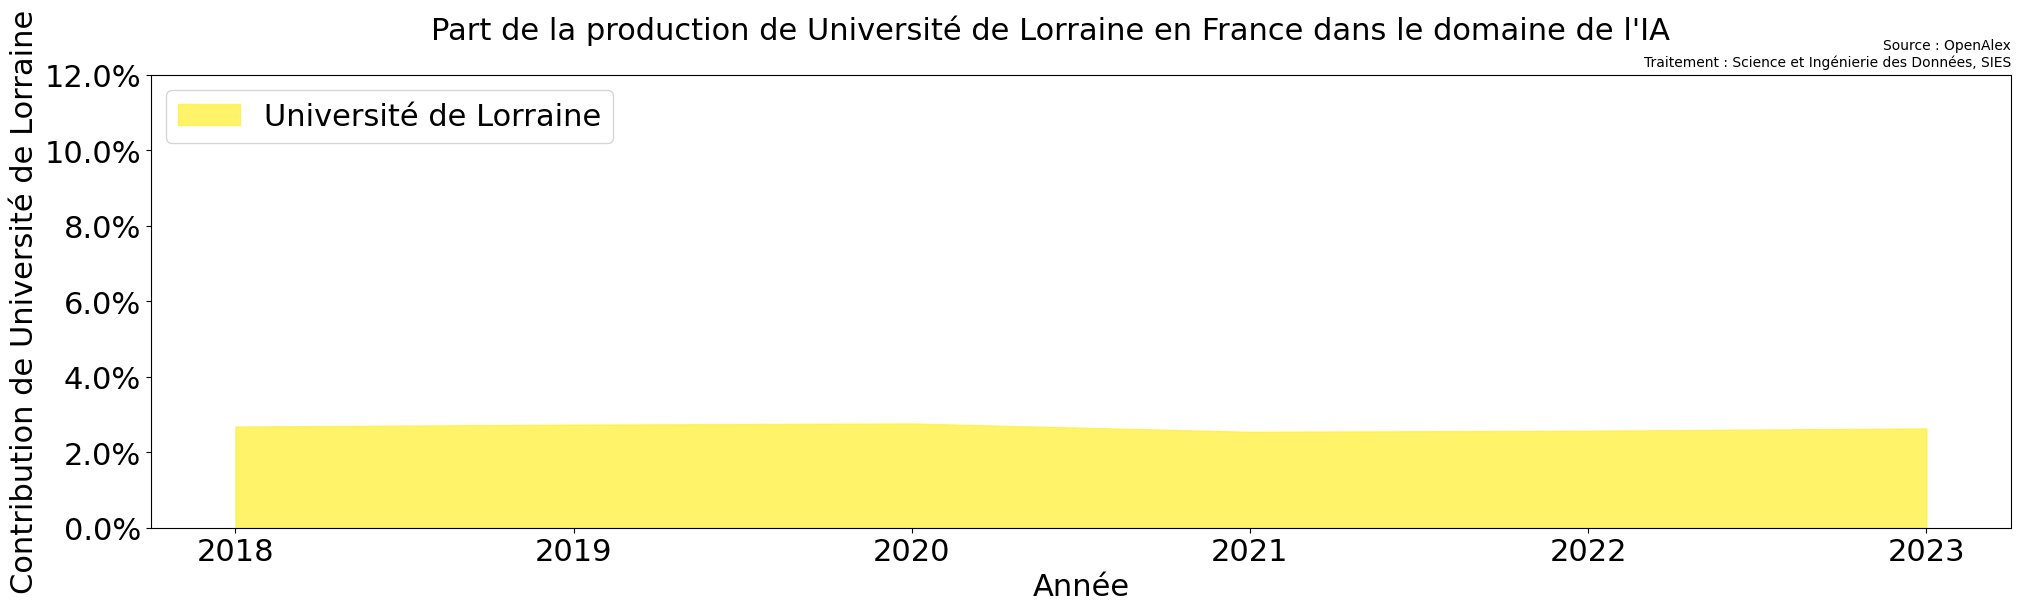

In [35]:
make_graph_share_year('Université de Lorraine', False)

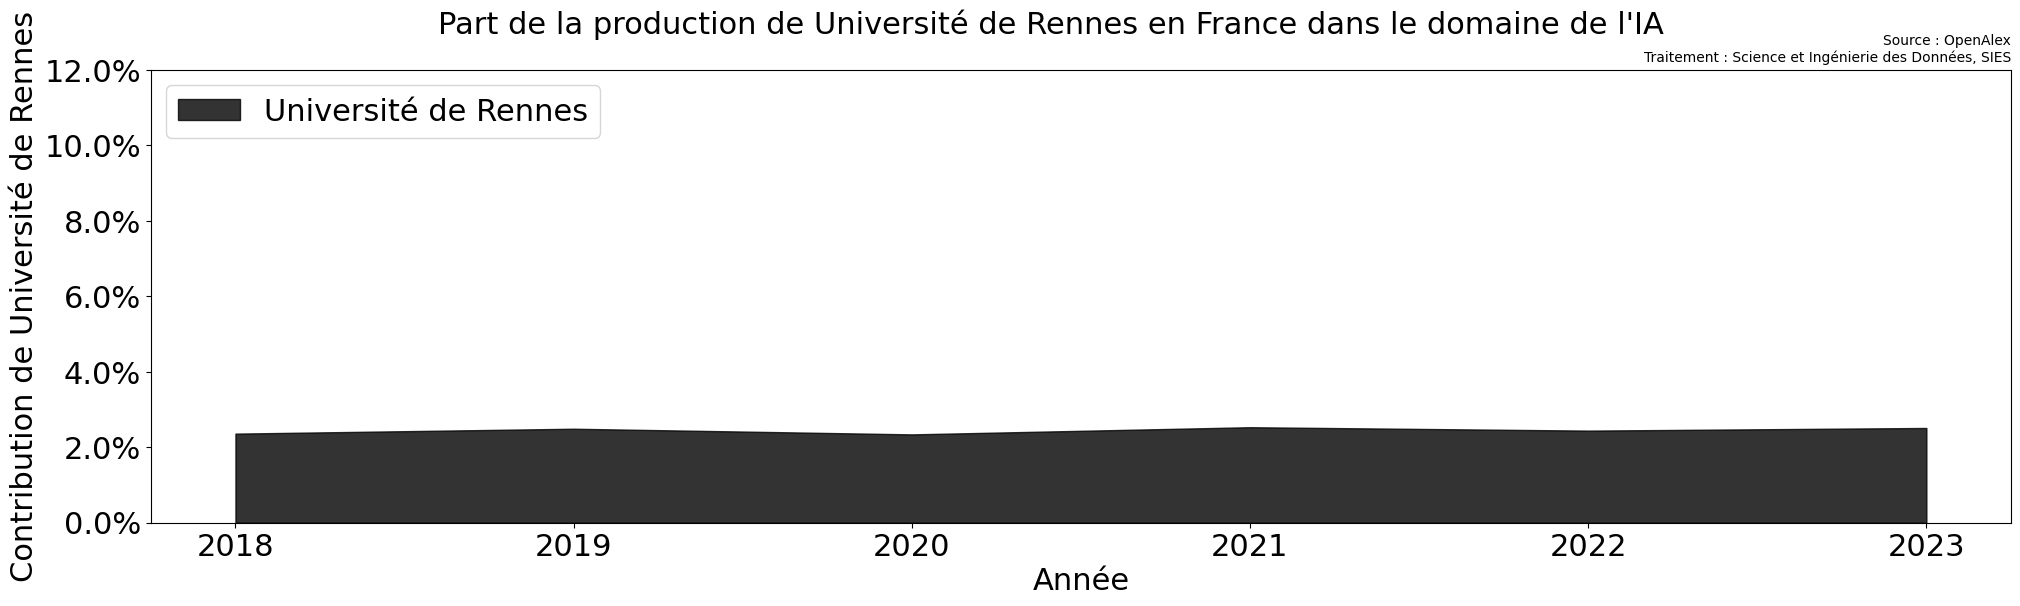

In [36]:
make_graph_share_year('Université de Rennes')

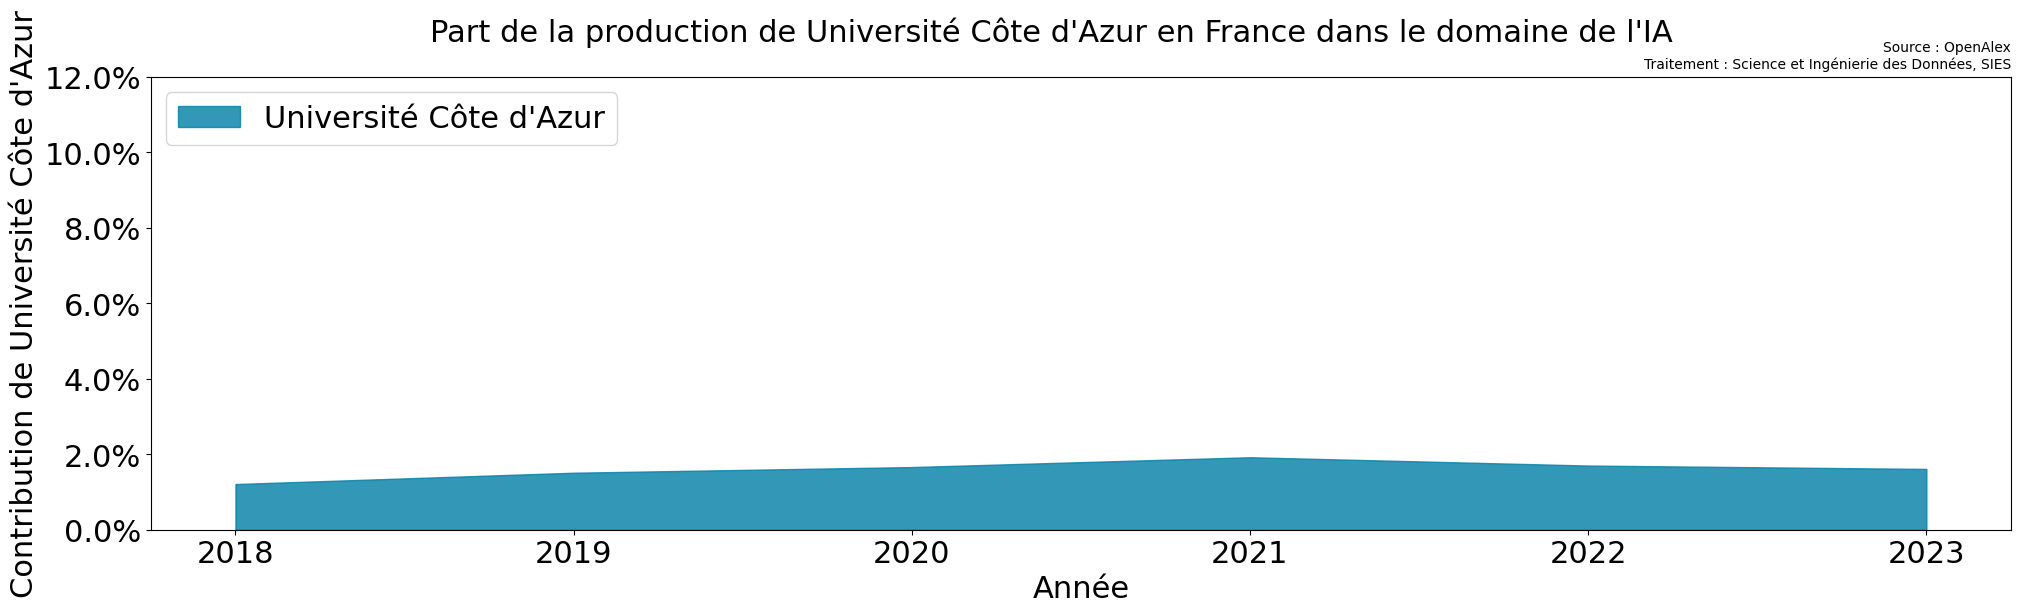

In [37]:
make_graph_share_year("Université Côte d'Azur")